- **Main objective is to manipulate the data to visualize the relations using Tsne for diffent kind of data.**

Donorschoos Dataset is a combination of categorical,numerica and text data. There are two csv files project_train and resourses ,which are used in this assignments. Tsne is performed only for 5000 data points. 

Here,
- Firstly resourse data(price and quantity) is murged with project_data to form new_project_data. 

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from bs4 import BeautifulSoup

#loading csv files

project_data = pd.read_csv(r'donorschoose-application-screening\train\train.csv')
resource_data = pd.read_csv(r'donorschoose-application-screening\resources\
                              \resources.csv')

print(project_data.shape)
print(resource_data.shape)


(182080, 16)
(1541272, 4)


<h1><font color='red'>Observation:1<font></h1>
<ol>
<li> Here project data(182080 x 16) and resource data(1541272 x 4) is having different number of data points.</li>
<li> We have to murge data set with respect to 'id' column to get new project data set which will contain(182080 x 18) as shape of data frame.</li>


In [ ]:
# Mearging Price and Quantity column with new_project_data

#https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames
price_df = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'})
          .reset_index()
print(price_df.head())

# new_project_data
new_project_data = pd.merge(project_data, price_df, on='id', how='left') 
print(new_project_data.shape)
new_project_data.head()

        id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8
(182080, 18)


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,299.98,6
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20.00,20
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,355.50,2


In [ ]:
value_count = new_project_data['project_is_approved'].value_counts()
print('Total projects approved: {0}, {1}%'.format(value_count[1],
(value_count[1]/(value_count[1]+value_count[0])*100)))
print('Total projects rejected: {0}, {1}%'.format(value_count[0],
(value_count[0]/(value_count[1]+value_count[0])*100)))

Total projects approved: 154346, 84.7682337434095%
Total projects rejected: 27734, 15.23176625659051%


<h1><font color='red'>Observation:2<font></h1>
<ol>
<li> Here new project data(182080 x 18) is formed by adding new data features as PRICE and QUANTITY.</li>
<li> Total project approval rate is around 85% compared to 15% rejection rate.</li>

# Univariate analysis for Catagorical Data:

<h2><font color='blue'>Univariate Analysis: teacher_number_of_previously_posted_projects</font></h2>

In [ ]:
df = pd.DataFrame(data=new_project_data)
df_previously_posted_projects_out = df[['teacher_number_of_previously_posted_projects']]

#finding mean and standard deviation for previously posted projects by teachers
from sklearn.preprocessing import StandardScaler
previously_posted_projects_scalar = StandardScaler()

previously_posted_projects_scalar
.fit(new_project_data['teacher_number_of_previously_posted_projects']
     .values.reshape(-1,1)) # finding the mean and standard deviation of this data

print(f"Mean : {previously_posted_projects_scalar.mean_[0]}, Standard deviation: 
               {np.sqrt(previously_posted_projects_scalar.var_[0])}")

#standardizing data
previously_posted_projects_standardized = previously_posted_projects_scalar
.transform(new_project_data['teacher_number_of_previously_posted_projects']
           .values.reshape(-1, 1))
df_previously_posted_projects_standardized = 
pd.DataFrame(previously_posted_projects_standardized, 
             columns = ['teacher_number_of_previously_posted_projects_standardized'])
df_previously_posted_projects_standardized.shape

#Creating data frame

praposal = pd.DataFrame(new_project_data
.groupby('teacher_number_of_previously_posted_projects')['project_is_approved']
.agg(lambda x: x.eq(1).sum())).reset_index()

praposal['total_projects'] = pd.DataFrame(new_project_data
.groupby('teacher_number_of_previously_posted_projects')['project_is_approved']
.agg({'total_projects':'count'})).reset_index()['total_projects']

# Inner loop to find 'projects_not_approved'

sub=[]

def inner(sub):
    for j in praposal['total_projects']:
        for k in praposal['project_is_approved']:
            sub=j-k
            return  
sub=praposal['total_projects']-praposal['project_is_approved']
inner(sub)

# Creating new column for project_not_approved

praposal.insert(loc=2, column='project_not_approved', value=sub)
praposal.sort_values(by=['total_projects'],inplace=True, ascending=False)

# percentage approval in %

def inner2(per):
    for j in praposal['total_projects']:
        for k in praposal['project_is_approved']:
            per=(k*100)/j
            return  
per= 100*praposal['project_is_approved']/praposal['total_projects']
inner2(per)

#Creating new column for percentage project approval

praposal.insert(loc=4, column='percentage_approval %', value=per)
praposal.sort_values(by=['total_projects'],inplace=True, ascending=False)
print(praposal.shape)
praposal.head(20)

Mean : 11.237055140597539, Standard deviation : 28.016009085834735
(401, 5)


,teacher_number_of_previously_posted_projects,project_is_approved,project_not_approved,total_projects,percentage_approval %
0,0,41022,9045,50067,81.934208
1,1,22213,4518,26731,83.098275
2,2,14461,2776,17237,83.895109
3,3,10006,1887,11893,84.133524
4,4,7421,1374,8795,84.377487
5,5,5871,1062,6933,84.681956
6,6,4810,807,5617,85.632900
7,7,3855,634,4489,85.876587
8,8,3303,553,3856,85.658714
9,9,2814,439,3253,86.504765


<h1><font color='red'>Observation:3<font></h1>
<ol>
<li> From mean and standard deviation of 'teacher_number_of_previously_posted_projects' it is evident that minimum of 0 and maximum of 40 projects are posted by the teachers.</li>
<li>Project approval is higher in the case of teachers have posted more projects before, But project posting rate decreases as count of previously posted projects increased.</li>


In [ ]:
#stacked bar plots matplotlib

def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    #p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    #plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()
    
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
# Count number of zeros in df: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2]
                        .agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2]
                                 .agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2]
                               .agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))
    


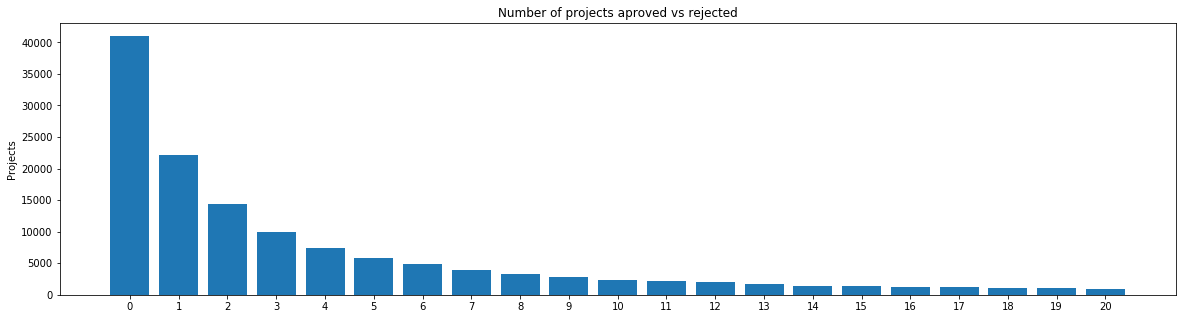

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                41022  50067   
1                                             1                22213  26731   
2                                             2                14461  17237   
3                                             3                10006  11893   
4                                             4                 7421   8795   

        Avg  
0  0.819342  
1  0.830983  
2  0.838951  
3  0.841335  
4  0.843775  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
16                                            16                 1283   1479   
17                                            17                 1167   1327   
18                                            18                 1065   1226   
19                                            19                 1016   1145   
20                                       

In [ ]:
univariate_barplots(new_project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=21)

<h1><font color='red'>Observation:2<font></h1>
<ol>
<li>Here mean of the 'teacher_number_of_previously_posted_projects' is around 11, and standard deviation is around 28. So,teachers are posting an average of 11 different projects.</li>
    <li>Can't see any relation between previously posted projects and approval rate after more then 20 projects praposed from barplot.</li>
    <li>Theachers who were new, and did not proposed any project before, have around 82% chance of approval with respect to total number of projects praposed.</li>
   

<h2><font color='blue'>Univariate Analysis: School states vs approval rate</font></h2>

In [ ]:
state_num_praposal = new_project_data.groupby('school_state')
.mean()[['project_is_approved']]
state_num_praposal.sort_values(by=['project_is_approved']
                               , inplace = True, ascending=False)
print('Total number of different states:{}'.format(state_num_praposal.count()))

Total number of different states : project_is_approved    51
dtype: int64


In [ ]:
state_num_praposal=pd.DataFrame(new_project_data
                                .groupby('school_state')['project_is_approved']
                                .agg(lambda x: x.eq(1).sum())).reset_index()

state_num_praposal['total_projects'] = pd.DataFrame(new_project_data
                                .groupby('school_state')['project_is_approved']
                                .agg({'total_projects':'count'}))
                                .reset_index()['total_projects']

    
state_num_praposal.sort_values(by=['total_projects']
                               ,inplace=True, ascending=False)
state_num_praposal.head(10)

def inner3(per):
    for j in state_num_praposal['total_projects']:
        for k in state_num_praposal['project_is_approved']:
            per=(k*100)/j
            return  
per= 100*state_num_praposal['project_is_approved']
      /state_num_praposal['total_projects']
inner3(per)

#Creating new column for percentage project approval

state_num_praposal.insert(loc=3, column='percentage_approval %', value=per)
state_num_praposal.sort_values(by=['total_projects']
                               ,inplace=True, ascending=False)
print(state_num_praposal.shape)
state_num_praposal.head(20)

print(state_num_praposal.describe())
state_num_praposal.head(20)

(51, 4)
       project_is_approved  total_projects  percentage_approval %
count            51.000000       51.000000              51.000000
mean           3026.392157     3570.196078              84.971255
std            3647.956787     4296.988937               1.535422
min             118.000000      139.000000              81.263858
25%             733.000000      885.500000              84.261788
50%            2074.000000     2480.000000              85.190409
75%            3547.000000     4096.500000              85.764066
max           22006.000000    25695.000000              89.134126


,school_state,project_is_approved,total_projects,percentage_approval %
4,CA,22006,25695,85.643121
43,TX,10036,12304,81.566970
34,NY,10377,12157,85.358230
9,FL,8541,10359,82.450043
27,NC,7223,8463,85.347985
14,IL,6260,7332,85.379160
10,GA,5535,6636,83.408680
40,SC,5590,6463,86.492341
22,MI,4496,5324,84.447784
38,PA,4342,5093,85.254271


182080


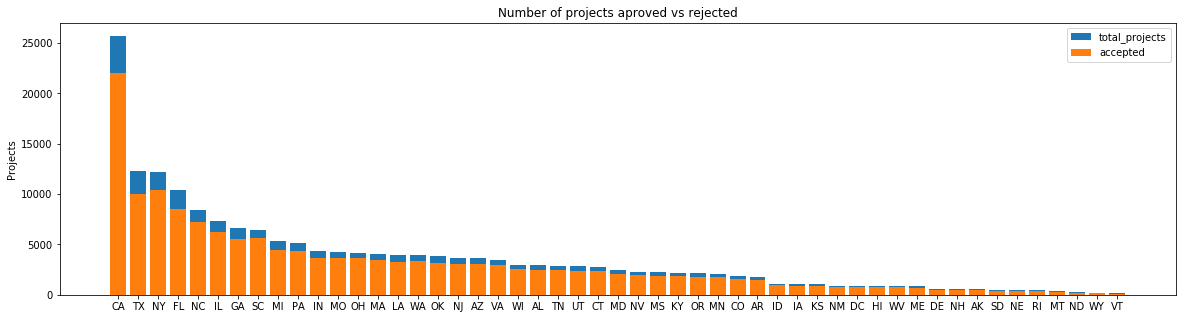

In [ ]:
col1='school_state'
col_1='teacher_prefix'
data=value_count[1]+value_count[0]
print(data)
def stack_plot(data, xtick, col2='project_is_approved', col3='total_projects'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total_projects', 'accepted'))
    plt.show()
    
stack_plot(state_num_praposal, xtick=col1, col2='project_is_approved', col3='total_projects')

<h1><font color='red'>Observation:3<font></h1>
<ol>
<li>State CA posted highest number of projects, but the approvel rate is not the highest among other states.</li>
    <li>Can't see any relation between total projects posted and approval rate by specific state.</li>
    <li>State DE have highest acceptance of project on about 89%. But state DC have lowes acceptance rate on about 81%.</li>

<h2><font color='blue'>Univariate Analysis: Teacher Prifix vs approval rate</font></h2>

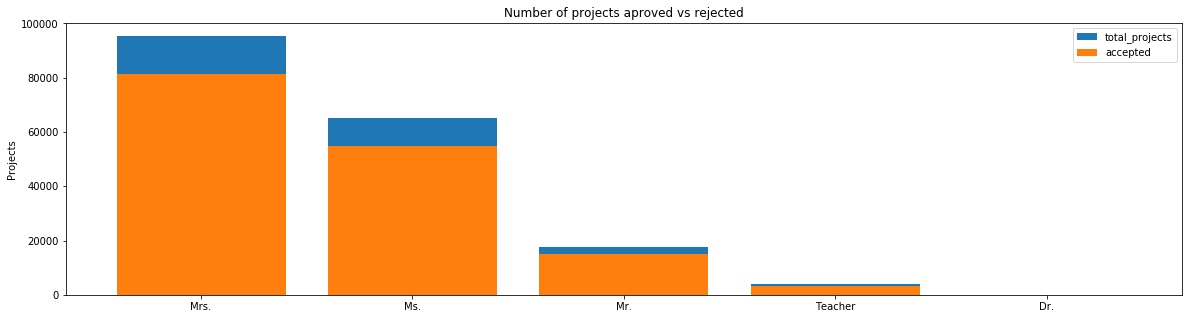

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                81484  95405  0.854085
3            Ms.                54854  65066  0.843052
1            Mr.                14876  17667  0.842022
4        Teacher                 3107   3912  0.794223
0            Dr.                   21     26  0.807692
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                81484  95405  0.854085
3            Ms.                54854  65066  0.843052
1            Mr.                14876  17667  0.842022
4        Teacher                 3107   3912  0.794223
0            Dr.                   21     26  0.807692


In [ ]:
univariate_barplots(new_project_data, 'teacher_prefix', 'project_is_approved' , top=False)

<h1><font color='red'>Observation:4<font></h1>
<ol>
<li>Teachers with prefix 'Mrs.' posted more number of projects and project approval rate is also high for them (about 85.4%).</li>
    <li>Teachers with prefix 'Teacher' has lowest approval rate on about 79.42%.</li>
    <li>Teachers with prefix 'Dr.' posted least amount of projects.</li>

<h2><font color='blue'>Univariate Analysis: grad_catagory vs approval rate</font></h2>

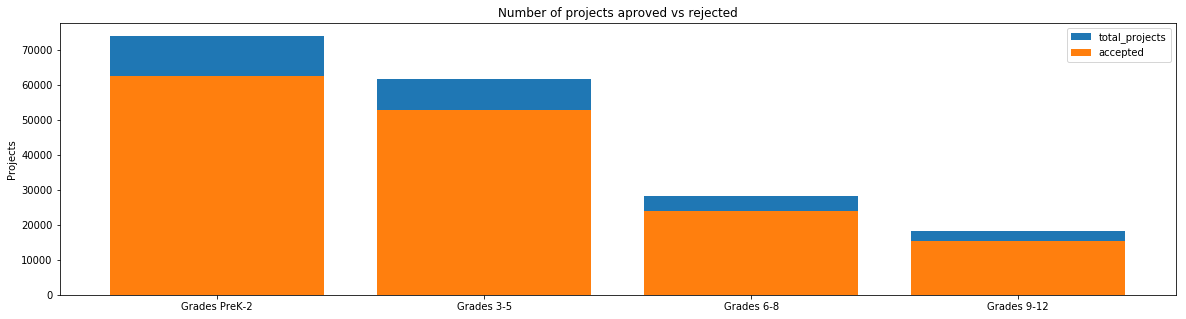

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                62594  73890  0.847124
0             Grades 3-5                52675  61682  0.853977
1             Grades 6-8                23783  28197  0.843459
2            Grades 9-12                15294  18311  0.835236
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                62594  73890  0.847124
0             Grades 3-5                52675  61682  0.853977
1             Grades 6-8                23783  28197  0.843459
2            Grades 9-12                15294  18311  0.835236


In [ ]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

<h1><font color='red'>Observation:5<font></h1>
<ol>
<li>'PreK-2' grad have highest projects praposals on about 73890, but approval rate is not highest(84.71%).</li>
    <li>Grades '3-5' have highest acceptance rate on about 85.39%.</li>
    <li>All grades have more then 83% of project approval rate, There are less projects praposed as grades increases.</li>

<h2><font color='blue'>Univariate Analysis: clean_subject_catagories vs clean_subject_subcatagories vs approval rate</font></h2>

In [ ]:
#cleaning subject_catagories

    
catogories = list(new_project_data['project_subject_categories'].values)
# remove special characters from list of strings python: 
#https://stackoverflow.com/a/47301924/4084039

cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts 
                           #["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory 
                        #based on space "Math & Science"=> "Math","&", "Science"
                                
            j=j.replace('The','') # if we have the words "The" we are going to 
                                  #replace it with ''(i.e removing 'The')
        j = j.replace(' ','') #we are placeing all the ' '(space) with ''(empty) 
                              #ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", 
                            #remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

new_project_data['clean_subject_categories'] = cat_list
new_project_data.drop(['project_subject_categories'], axis=1, inplace=True)  

In [ ]:
# cleaning subject_subcatagories


catogories = list(new_project_data['project_subject_subcategories'].values)

cat_list = []
for i in catogories:
    temp = ""
   
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_') 
    cat_list.append(temp.strip())

new_project_data['clean_subject_subcategories'] = cat_list
new_project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
new_project_data.head()    

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_subject_categories,clean_subject_subcategories
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,299.98,6,Literacy_Language,Literacy
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20.00,20,Music_Arts Health_Sports,PerformingArts TeamSports
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1,Math_Science Literacy_Language,AppliedSciences Literature_Writing
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5,Health_Sports,Health_Wellness
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,355.50,2,Health_Sports,Health_Wellness


In [ ]:
from collections import Counter
my_counter = Counter()
for word in new_project_data['clean_subject_categories'].values:
    my_counter.update(word.split())

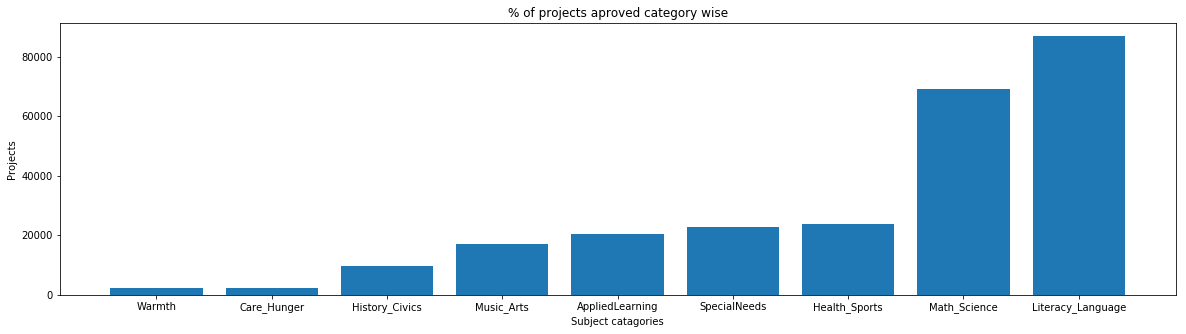

In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.xlabel('Subject catagories')
plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [ ]:
my_counter = Counter()
for word in new_project_data['clean_subject_subcategories'].values:
    my_counter.update(word.split())

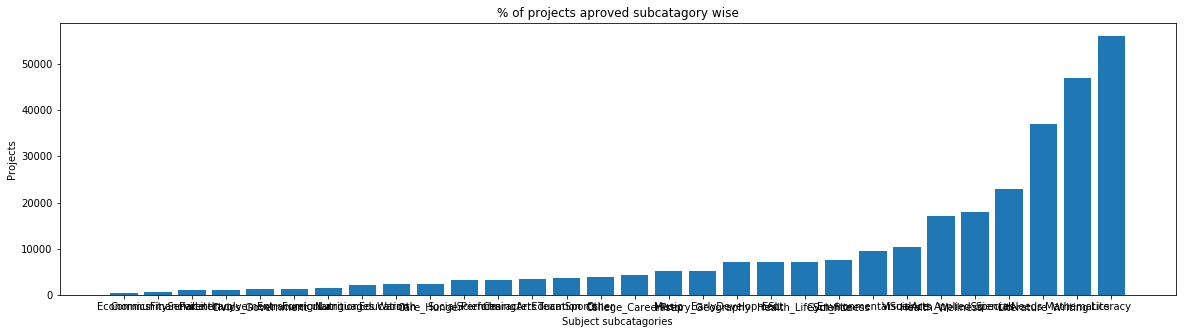

In [ ]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.xlabel('Subject subcatagories')
plt.ylabel('Projects')
plt.title('% of projects aproved subcatagory wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [ ]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       431
CommunityService     :       712
FinancialLiteracy    :       956
ParentInvolvement    :      1103
Civics_Government    :      1294
Extracurricular      :      1332
ForeignLanguages     :      1496
NutritionEducation   :      2236
Warmth               :      2327
Care_Hunger          :      2327
SocialSciences       :      3149
PerformingArts       :      3223
CharacterEducation   :      3519
TeamSports           :      3643
Other                :      3948
College_CareerPrep   :      4291
Music                :      5172
History_Geography    :      5258
EarlyDevelopment     :      7149
ESL                  :      7162
Health_LifeScience   :      7175
Gym_Fitness          :      7592
EnvironmentalScience :      9436
VisualArts           :     10399
Health_Wellness      :     17099
AppliedSciences      :     17966
SpecialNeeds         :     22881
Literature_Writing   :     36974
Mathematics          :     46884
Literacy             :     56066


<h1><font color='red'>Observation:6<font></h1>
<ol>
<li>About 56066 projects where approved in listeracy criteria .</li>
    <li>Mathematics being the second most approved topic.</li>
    <li>'Economics' as the project subcatagorie got the least projects proposals.</li>
    <li>People have more interest in maths&science and literacy&language catagories.</li>

## One Hot encoding of categorical data:

In [ ]:
#One hot encoding of 'teacher_prefix'
df = pd.DataFrame(data=new_project_data)
df_prefix_out = df[['teacher_prefix']]
print(df_prefix_out.head())

df_onehot_prefix=pd.get_dummies(df_prefix_out,prefix=['prefix'],
                                drop_first=False)

#inserting new column 'project_approved'
df_project_approved = df[['project_is_approved']]
df_onehot_prefix.insert(loc=5, column='project_approved', 
                        value=df_project_approved)
df_onehot_prefix.head()

  teacher_prefix
0            Ms.
1           Mrs.
2            Ms.
3            Mr.
4            Mr.


,prefix_Dr.,prefix_Mr.,prefix_Mrs.,prefix_Ms.,prefix_Teacher,project_approved
0,0,0,0,1,0,1
1,0,0,1,0,0,0
2,0,0,0,1,0,1
3,0,1,0,0,0,0
4,0,1,0,0,0,1


In [ ]:
#One hot encoding of 'school_state'
df = pd.DataFrame(data=new_project_data)
df_state_out = df[['school_state']]
print(df_state_out.head())
df_onehot_school_state=pd.get_dummies(df_state_out,prefix=['state'], 
                                      drop_first=False)

print(df_onehot_school_state.shape)
df_onehot_school_state.head()

  school_state
0           NV
1           GA
2           UT
3           NC
4           CA
(182080, 51)


,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
##One hot encoding of 'project_grad_category'
df = pd.DataFrame(data=new_project_data)
df_grade_out = df[['project_grade_category']]
print(df_grade_out.head())

df_onehot_grade_category=pd.get_dummies(df_grade_out,prefix=['state'], 
                                        drop_first=False)
print(df_onehot_grade_category.shape)
df_onehot_grade_category.head()

  project_grade_category
0          Grades PreK-2
1             Grades 3-5
2             Grades 3-5
3             Grades 3-5
4             Grades 6-8
(182080, 4)


,state_Grades 3-5,state_Grades 6-8,state_Grades 9-12,state_Grades PreK-2
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


In [ ]:
df = pd.DataFrame(data=new_project_data)

df_clean_subject_categories = df[['clean_subject_categories']]
print(df_clean_subject_categories.head())
df_onehot_subject_category=pd.get_dummies(df_clean_subject_categories,
                                          prefix=[''], drop_first=False)
print(df_onehot_subject_category.shape)
df_onehot_subject_category.head()

         clean_subject_categories
0               Literacy_Language
1        Music_Arts Health_Sports
2  Math_Science Literacy_Language
3                   Health_Sports
4                   Health_Sports
(182080, 51)


,_AppliedLearning,_AppliedLearning Health_Sports,_AppliedLearning History_Civics,_AppliedLearning Literacy_Language,_AppliedLearning Math_Science,_AppliedLearning Music_Arts,_AppliedLearning SpecialNeeds,_AppliedLearning Warmth Care_Hunger,_Health_Sports,_Health_Sports AppliedLearning,...,_Music_Arts AppliedLearning,_Music_Arts Health_Sports,_Music_Arts History_Civics,_Music_Arts SpecialNeeds,_Music_Arts Warmth Care_Hunger,_SpecialNeeds,_SpecialNeeds Health_Sports,_SpecialNeeds Music_Arts,_SpecialNeeds Warmth Care_Hunger,_Warmth Care_Hunger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(data=new_project_data)

df_clean_subject_subcategories = df[['clean_subject_subcategories']]
df_onehot_subject_subcategory=pd.get_dummies(df_clean_subject_subcategories,
                                             prefix=[''], drop_first=False)
print(df_onehot_subject_subcategory.shape)
df_onehot_subject_subcategory.head()

(182080, 407)


,_AppliedSciences,_AppliedSciences CharacterEducation,_AppliedSciences Civics_Government,_AppliedSciences College_CareerPrep,_AppliedSciences CommunityService,_AppliedSciences ESL,_AppliedSciences EarlyDevelopment,_AppliedSciences Economics,_AppliedSciences EnvironmentalScience,_AppliedSciences Extracurricular,...,_SocialSciences VisualArts,_SpecialNeeds,_SpecialNeeds TeamSports,_SpecialNeeds VisualArts,_SpecialNeeds Warmth Care_Hunger,_TeamSports,_TeamSports VisualArts,_VisualArts,_VisualArts Warmth Care_Hunger,_Warmth Care_Hunger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Univariate analysis for Text Data:

# Title cleaning

In [ ]:
def decontracted(string):
    string = re.sub(r"won\'t", "will not", string)
    string = re.sub(r"can\'t", "can not", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    return string

preprocessing_title_text = []

for string in tqdm(new_project_data['project_title'].values):
    string = decontracted(string)
    string = re.sub("\S*\d\S*", "", string).strip()
    string = re.sub('[^A-Za-z0-9]+', ' ', string)
    preprocessing_title_text.append(string.strip())

100%|███████████████████████████████████████████████████████████████████████| 182080/182080 [00:02<00:00, 61028.35it/s]


In [ ]:
preprocessing_title_text[1]

'Keep Calm and Dance On'

In [ ]:

df_clean_title = pd.DataFrame(preprocessing_title_text, columns = 
                              ['clean_project_title']) 
print(df_clean_title.head())

new_project_data.replace(to_replace=df_clean_title['clean_project_title'], 
                         value='project_title',inplace=True)
new_project_data.head()
new_project_data_1 = new_project_data

                                 clean_project_title
0                           Super Sight Word Centers
1                             Keep Calm and Dance On
2                                      Lets to Learn
3  Kid Inspired Equipment to Increase Activities ...
4    We need clean water for our culinary arts class


<h2><font color='blue'>Univariate Analysis: Text data: Title</font></h2> 

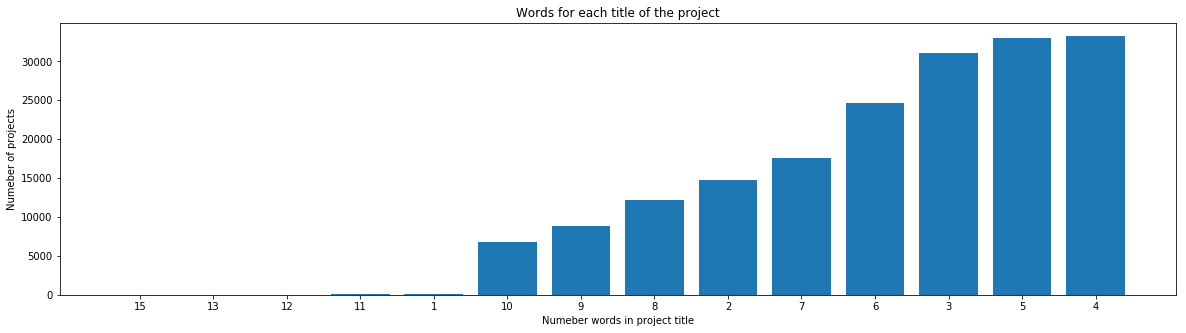

In [ ]:
#calculate number of words in a string in DataFrame:
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [ ]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]
                            ['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]
                            ['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

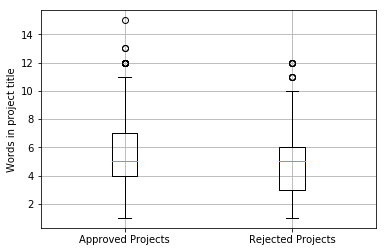

In [ ]:
# box plot
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

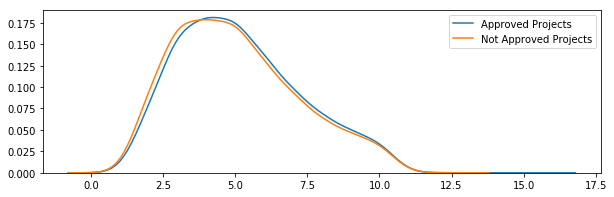

In [ ]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

<h1><font color='red'>Observation:7<font></h1>
<ol>
<li>It is interesting to note that as number of words in project title is between 2 and 10, acceptance rate drastically increased.</li>
    <li>If project title have 4 to 5 words in the title ,then the project has higher chance of approval.</li>
    <li>No projects where appreved who has more then 11 word in title.</li>
    <li>Box plot and PDF plot is not giving any significant detail about the acceptace rate.</li>

<h2><font color='blue'>Univariate Analysis: Text data: Essay</font></h2>

In [ ]:
# merge four column text dataframe:

new_project_data["essay"] = new_project_data["project_essay_1"].map(str) +\
                        new_project_data["project_essay_2"].map(str) + \
                        new_project_data["project_essay_3"].map(str) + \
                        new_project_data["project_essay_4"].map(str)

In [ ]:
new_project_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_subject_categories,clean_subject_subcategories,essay
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,299.98,6,Literacy_Language,Literacy,Most of my kindergarten students come from low...
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,20.00,20,Music_Arts Health_Sports,PerformingArts TeamSports,Our elementary school is a culturally rich sch...
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1,Math_Science Literacy_Language,AppliedSciences Literature_Writing,Hello;\r\nMy name is Mrs. Brotherton. I teach ...
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5,Health_Sports,Health_Wellness,My students are the greatest students but are ...
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,355.50,2,Health_Sports,Health_Wellness,My students are athletes and students who are ...


In [ ]:
approved_word_count=new_project_data[new_project_data['project_is_approved']==1]
                                      ['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count=new_project_data[new_project_data['project_is_approved']==0]
                                      ['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

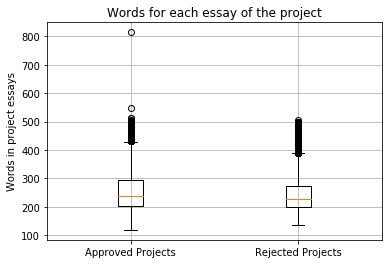

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

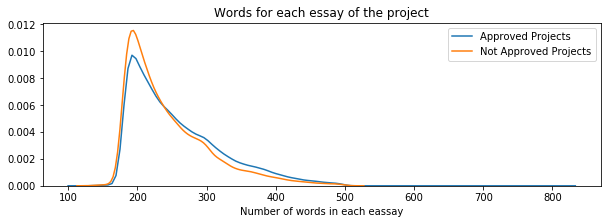

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

<h1><font color='red'>Observation:8<font></h1>
<ol>
<li>From PDF it is is interesting to note that if the word count of essay increase more then 250 word then project have slightly higher chance of approval rate.</li>
    <li>essay less then 250 words have higher chance of rejection rate.</li>

# Univariate analysis on Numerical Data:

<h2><font color='blue'>Univariate Analysis: Price vs Project approval</font></h2>

In [ ]:
approved_price = new_project_data[new_project_data['project_is_approved']==1]
['price'].values

rejected_price = new_project_data[new_project_data['project_is_approved']==0]
['price'].values

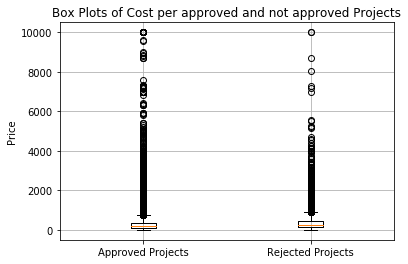

In [ ]:
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

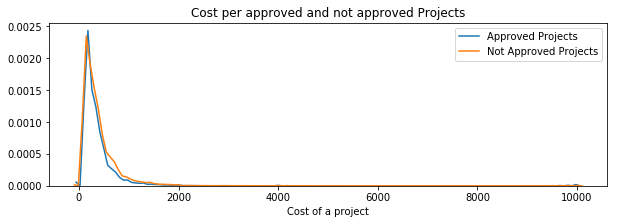

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), 
               np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.1          |
|     5      |       13.59       |         43.25         |
|     10     |       33.57       |         74.956        |
|     15     |       57.98       |         99.96         |
|     20     |       77.47       |        119.294        |
|     25     |       99.95       |        141.932        |
|     30     |       116.45      |         162.71        |
|     35     |       136.85      |        184.216        |
|     40     |       157.0       |        207.018        |
|     45     |       178.19      |        232.974        |
|     50     |       198.99      |         260.96        |
|     55     |       224.14      |        290.392        |
|     60     |       255.58      |        322.606        |
|     65     |       286.0       |        359.945       

<h1><font color='red'>Observation:9<font></h1>
<ol>
<li>From above PDF and box plot we can say that 'Cost' is not the important feature which is affecting the project approval rate.</li>

# Bow on title

In [ ]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessing_title_text)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (182080, 4389)


# TFIDF on title

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessing_title_text)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (182080, 4389)


# W2VEC on title

In [ ]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel(r'C:\Users\DEVARSHI\Desktop\glove.42B.300d.txt')

Loading Glove Model


1917494it [03:09, 10122.00it/s]


Done. 1917494  words loaded!


In [ ]:
words = []

for i in preprocessing_title_text:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: 
#http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


all the words in the coupus 947194
the unique words in the coupus 29001
The number of words that are present in both glove vectors and our coupus 4632 ( 15.972 %)
word 2 vec length 4632


# weighted W2VEC

In [ ]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
avg_w2v_vectors = []; # the avg-w2v for each sentence is stored in this list
for sentence in tqdm(preprocessing_title_text): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████| 182080/182080 [00:01<00:00, 176107.11it/s]


182080
300


# TFIDF weighted avg W2VEC

In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessing_title_text)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence is stored in this list
for sentence in tqdm(preprocessing_title_text): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word

            # here we are multiplying idf value(dictionary[word]) 
            # and the tf value((sentence.count(word)/len(sentence.split())))
            
            # getting the tfidf value for each word
            tf_idf=dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████| 182080/182080 [00:01<00:00, 103085.13it/s]


182080
300


## standardizing 'price' 

In [ ]:

from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
# finding the mean and standard deviation of this data
price_scalar.fit(new_project_data['price'].values.reshape(-1,1)) 
print('Mean' : {price_scalar.mean_[0]}
      ,'Standard deviation' : {np.sqrt(price_scalar.var_[0])})

price_standardized = price_scalar.transform(new_project_data['price']
                                            .values.reshape(-1, 1))
print(price_standardized)
df_price_standardized = pd.DataFrame(price_standardized
                                     , columns = ['price_standardized'])
print(df_price_standardized.head())
df_price_standardized.shape


Mean : 297.73130437170477, Standard deviation : 366.7169949349366
[[ 0.00613196]
 [-0.75734506]
 [ 0.46973197]
 ...
 [ 0.95806494]
 [-0.73078507]
 [ 0.10980864]]
   price_standardized
0            0.006132
1           -0.757345
2            0.469732
3            1.054597
4            0.157529


(182080, 1)

## Standardizing 'previously posted projects'

In [ ]:
from sklearn.preprocessing import StandardScaler

project_scalar = StandardScaler()
# finding the mean and standard deviation of this data
project_scalar.fit(new_project_data['teacher_number_of_previously_posted_projects']
                   .values.reshape(-1,1))
print('Mean :'{project_scalar.mean_[0]}
      , 'Standard deviation :' {np.sqrt(project_scalar.var_[0])}")

project_standardized = project_scalar
.transform(new_project_data['teacher_number_of_previously_posted_projects']
           .values.reshape(-1, 1))
print(project_standardized)

df_project_standardized = pd.DataFrame(project_standardized
                                       , columns = ['project_standardized'])
df_project_standardized.shape

Mean : 11.237055140597539, Standard deviation : 28.016009085834735
[[ 0.52694675]
 [-0.36540019]
 [-0.22262468]
 ...
 [ 1.31221206]
 [ 0.63402838]
 [-0.36540019]]


(182080, 1)

# Tsne Implimentation

### Tsne via BOW

In [ ]:
##applying Tsne for 5000 data points.

from scipy.sparse import hstack
X = hstack((df_onehot_prefix, df_onehot_school_state, df_onehot_grade_category
            , df_onehot_subject_category, df_onehot_subject_subcategory
            , df_project_standardized, df_price_standardized, title_bow))
X.shape
X = X.tocsr()
X_new = X[0:5000,:]
X_new.shape

(5000, 4910)

In [ ]:
labels = new_project_data['project_is_approved']
new_labels = labels[0:5000]

(5000, 2)
(5000, 3)
(5000, 3)


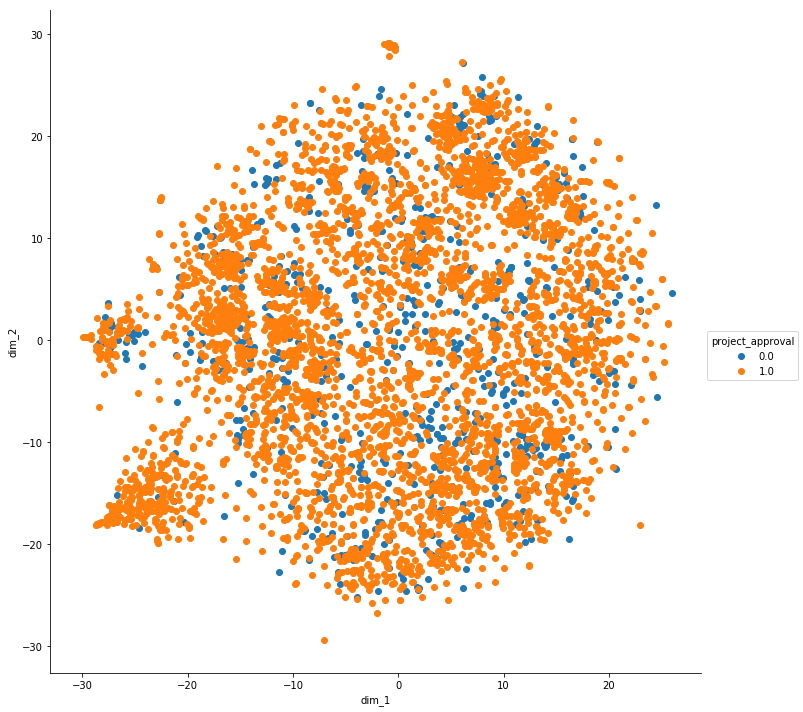

In [ ]:

import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import time

tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)
X_embedding = tsne.fit_transform(X_new.toarray())
print(X_embedding.shape)
t_sne_data = np.vstack((X_embedding.T, new_labels)).T
print(t_sne_data.shape)
t_sne_data_frame = pd.DataFrame(data=t_sne_data, columns = ('dim_1','dim_2','project_approval'))
print(t_sne_data_frame.shape)

sb.FacetGrid(t_sne_data_frame, hue = 'project_approval', size = 10).map(plt.scatter,'dim_1','dim_2').add_legend()
plt.show()

### Tsne via TFIDF

In [ ]:
Y = hstack((df_onehot_prefix, df_onehot_school_state, df_onehot_grade_category
            , df_onehot_subject_category, df_onehot_subject_subcategory
            , df_project_standardized, df_price_standardized, title_tfidf))
Y.shape
Y = Y.tocsr()
Y_new = Y[0:5000,:]
Y_new.shape

(5000, 4910)

(5000, 2)
(5000, 3)
(5000, 3)


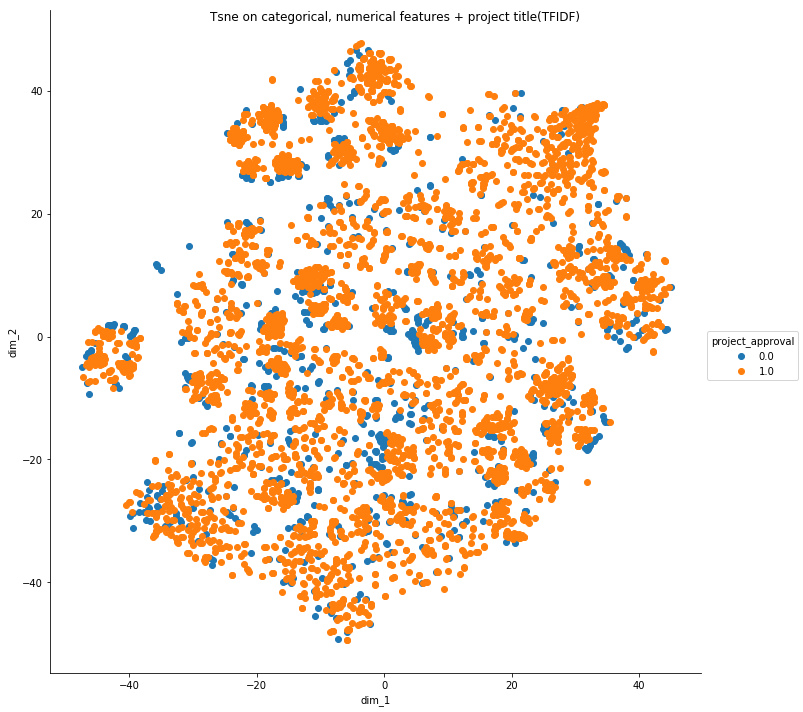

In [ ]:
tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)
Y_embedding = tsne.fit_transform(Y_new.toarray())
print(Y_embedding.shape)
t_sne_data = np.vstack((Y_embedding.T, new_labels)).T
print(t_sne_data.shape)
t_sne_data_frame = pd.DataFrame(data=t_sne_data, columns = ('dim_1','dim_2'
                                                        ,'project_approval'))
print(t_sne_data_frame.shape)

sb.FacetGrid(t_sne_data_frame, hue = 'project_approval', size = 10)
.map(plt.scatter,'dim_1','dim_2').add_legend()
.fig.suptitle("Tsne on categorical, numerical features + project title(TFIDF)")
plt.show()


### Tsne via AVG W2V

In [ ]:
Z = hstack((df_onehot_prefix, df_onehot_school_state, df_onehot_grade_category
            , df_onehot_subject_category, df_onehot_subject_subcategory
            , df_project_standardized, df_price_standardized, avg_w2v_vectors))
Z.shape
Z = Z.tocsr()
Z_new = Z[0:5000,:]
Z_new.shape

(5000, 821)

(5000, 2)
(5000, 3)
(5000, 3)


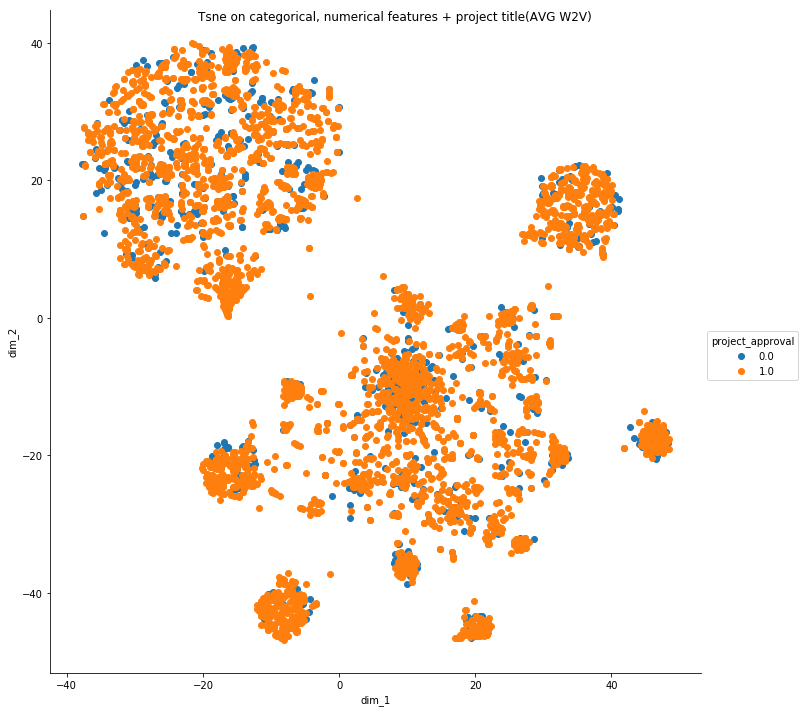

In [ ]:
tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)
Z_embedding = tsne.fit_transform(Z_new.toarray())
print(Z_embedding.shape)
t_sne_data = np.vstack((Z_embedding.T, new_labels)).T
print(t_sne_data.shape)
t_sne_data_frame = pd.DataFrame(data=t_sne_data, columns = ('dim_1','dim_2'
                                                        ,'project_approval'))
print(t_sne_data_frame.shape)

sb.FacetGrid(t_sne_data_frame, hue = 'project_approval', size = 10)
.map(plt.scatter,'dim_1','dim_2').add_legend()
.fig.suptitle("Tsne on categorical, numerical features + project title(AVG W2V)")
plt.show()


### Tsne via TFIDF W2V

In [ ]:
W = hstack((df_onehot_prefix, df_onehot_school_state, df_onehot_grade_category
          , df_onehot_subject_category, df_onehot_subject_subcategory
          , df_project_standardized, df_price_standardized, tfidf_w2v_vectors))
W.shape
W = W.tocsr()
W_new = W[0:5000,:]
W_new.shape

(5000, 821)

(5000, 2)
(5000, 3)
(5000, 3)


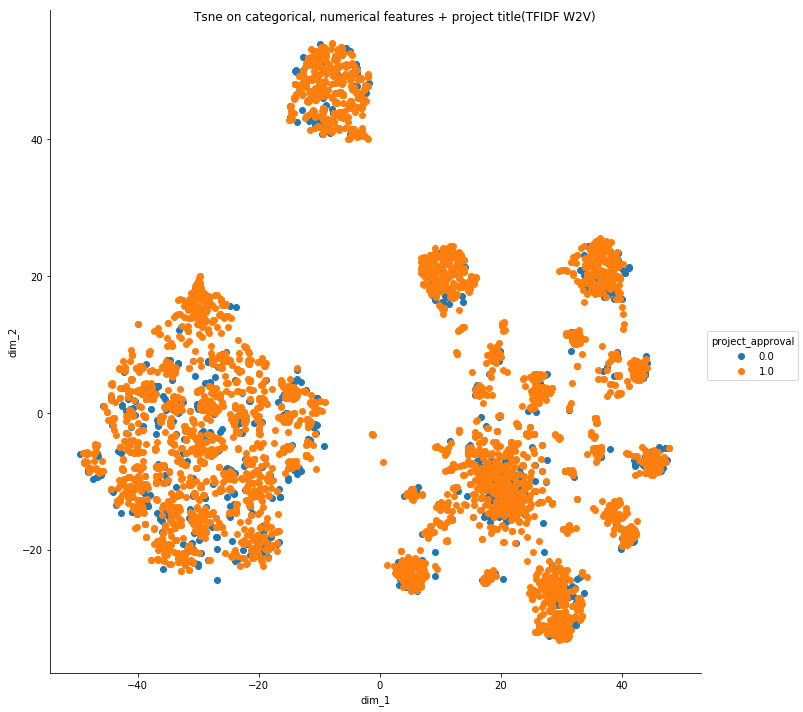

In [ ]:
tsne = TSNE(n_components=2, perplexity=100, learning_rate=200)
W_embedding = tsne.fit_transform(W_new.toarray())
print(W_embedding.shape)
t_sne_data = np.vstack((W_embedding.T, new_labels)).T
print(t_sne_data.shape)
t_sne_data_frame = pd.DataFrame(data=t_sne_data, columns = ('dim_1','dim_2'
                                                        ,'project_approval'))
print(t_sne_data_frame.shape)

sb.FacetGrid(t_sne_data_frame, hue = 'project_approval', size = 10)
.map(plt.scatter,'dim_1','dim_2').add_legend()
.fig.suptitle("Tsne on categorical, numerical features + project title(TFIDF W2V)")
plt.show()

<h1><font color='red'>Observation:10<font></h1>
<ol>
<li>Here t-SNE is failing to saparate both classes for 5000 data points in all methods.</li>

<h1><font color='red'>SUMMARY:<font></h1>

<li>Teachers who have posted more projects previously have higher chance of acceptance.</li>
<li>State DE have highest acceptance of project on about 89%, State DC have lowes acceptance rate on about 81%.</li>
<li>State CA posted highest number of projects with acceptace rate of 85.64%.</li>
<li>Projects praposed by the gender female, have higher chance of project approval.</li>
<li>There are more number of projects praposed for Grades PreK-2, but least projects were praposed for Grades 9-12. Trend of project praposal rate is decreasing with the grade increase.</li>
<li>Literacy&language is the most popular choice and maths&science is the second most choice for project praposal. Bothe catagories can be combine with the other subjects to see the improvement in project acceptance.</li>
<li>Poject title having 3 to 5 words in Title have higher chance of approval.</li>
<li>Essay lengthe should be higher then 250 words to get slightly high chance of approval.</li>
<li>Project price cant be more then 10000 and lower project prices can help to improve chances of project selection.</li>
<li>Tsne is failing to form clusters for visualization another method should be used for better saperation od data points.</li>